In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#data
Resp=pd.read_csv("atusresp_0323.dat")
Raster=pd.read_csv("atusrost_0323.dat")

In [3]:
# vars interested in 
respondent_vars = ['TUCASEID', 'TRTALONE', 'TRNUMHOU', 'TRSPPRES', 'TELFS', 'TRTSPONLY', 'TRTFAMILY']
roster_vars = ['TUCASEID', 'TEAGE', 'TESEX'] 

Dependent:
TRTALONE: Total time (in minutes) the respondent spent alone, excluding sleep.

Predictors used:

TUCASEID: Unique identifier for each household.
TRNUMHOU: Number of people living in the respondents household.
TELFS: Labor force status of the respondent.
1 Employed - at work
2 Employed - absent
3 Unemployed - on layoff
4 Unemployed - looking
5 Not in labor force


TRSPPRES: Presence of the respondents spouse or unmarried partner in the household, coded as follows:
1: Spouse present
2:Unmarried partner present
3:No spouse or partner present
TRTFAMILY: Total time (in minutes) the respondent spent with family members, excluding work-related activities.
TRTSPONLY: Total time (in minutes) the respondent spent exclusively with their spouse, excluding work-related activities.
TESEX: Sex of the respondent.
TEAGE: Age of the respondent. 



In [4]:
# Subset the data to the variables of interest
respondent_subset = Resp[respondent_vars]
roster_subset = Raster[roster_vars]
# Merge the files on the ID column
merged_df = pd.merge(respondent_subset, roster_subset, on='TUCASEID', how='inner')
# I am investigating only for the adults 
adults_df = merged_df[merged_df['TEAGE'] >18]

#take a random sample as the data is huge 
sampled_df = adults_df.sample(n=10000, random_state=42)  # random_state for reproducibility

final_df = sampled_df.drop_duplicates(subset='TUCASEID')


In [25]:
# Add a year col
final_df['YEAR'] = final_df['TUCASEID'].astype(str).str[:4].astype(int)
# rename cols so it its easy to understand 
data.rename(columns={'TRNUMHOU':'HH_size', 'TEAGE':'Age', 'TESEX':'Sex', 'TELFS':'Labour_Status', 
                    'TRSPPRES':'Spouse_Partner_Presence', 'TRTSPONLY':'TimewithSpouse/Partener(Minutes)', 'TRTFAMILY':
                     'TimewithFamily(Minutes)'}, inplace=True)

/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_5112/3887680611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['YEAR'] = final_df['TUCASEID'].astype(str).str[:4].astype(int)
/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_5112/3887680611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'TRNUMHOU':'HH_size', 'TEAGE':'Age', 'TESEX':'Sex', 'TELFS':'Labour_Status',


In [26]:
data=final_df
data.to_csv('data.csv')

Data Exploration 

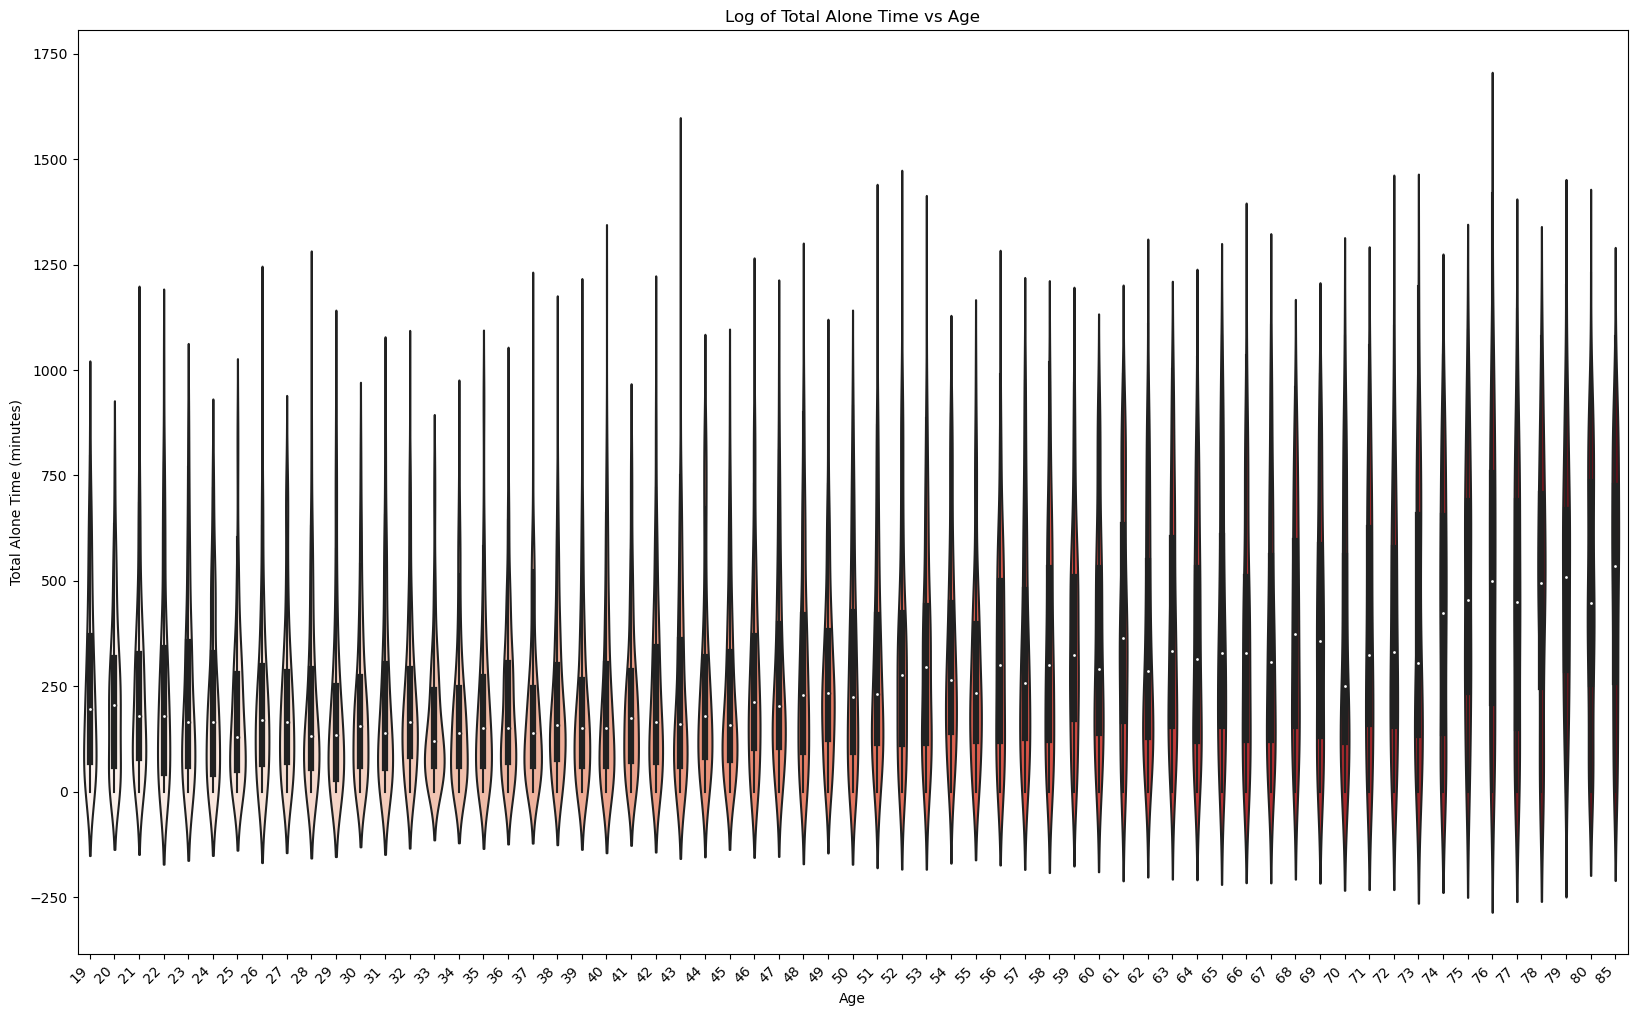

In [28]:
# Distribtuion of Total Alone Time by Age 

plt.figure(figsize=(20, 12))

sns.violinplot(data=final_df, x='Age', y='TRTALONE', palette='Reds')
plt.title('Log of Total Alone Time vs Age')
plt.xlabel('Age')
plt.ylabel('Total Alone Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()



/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_5112/308523683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Age Group'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)


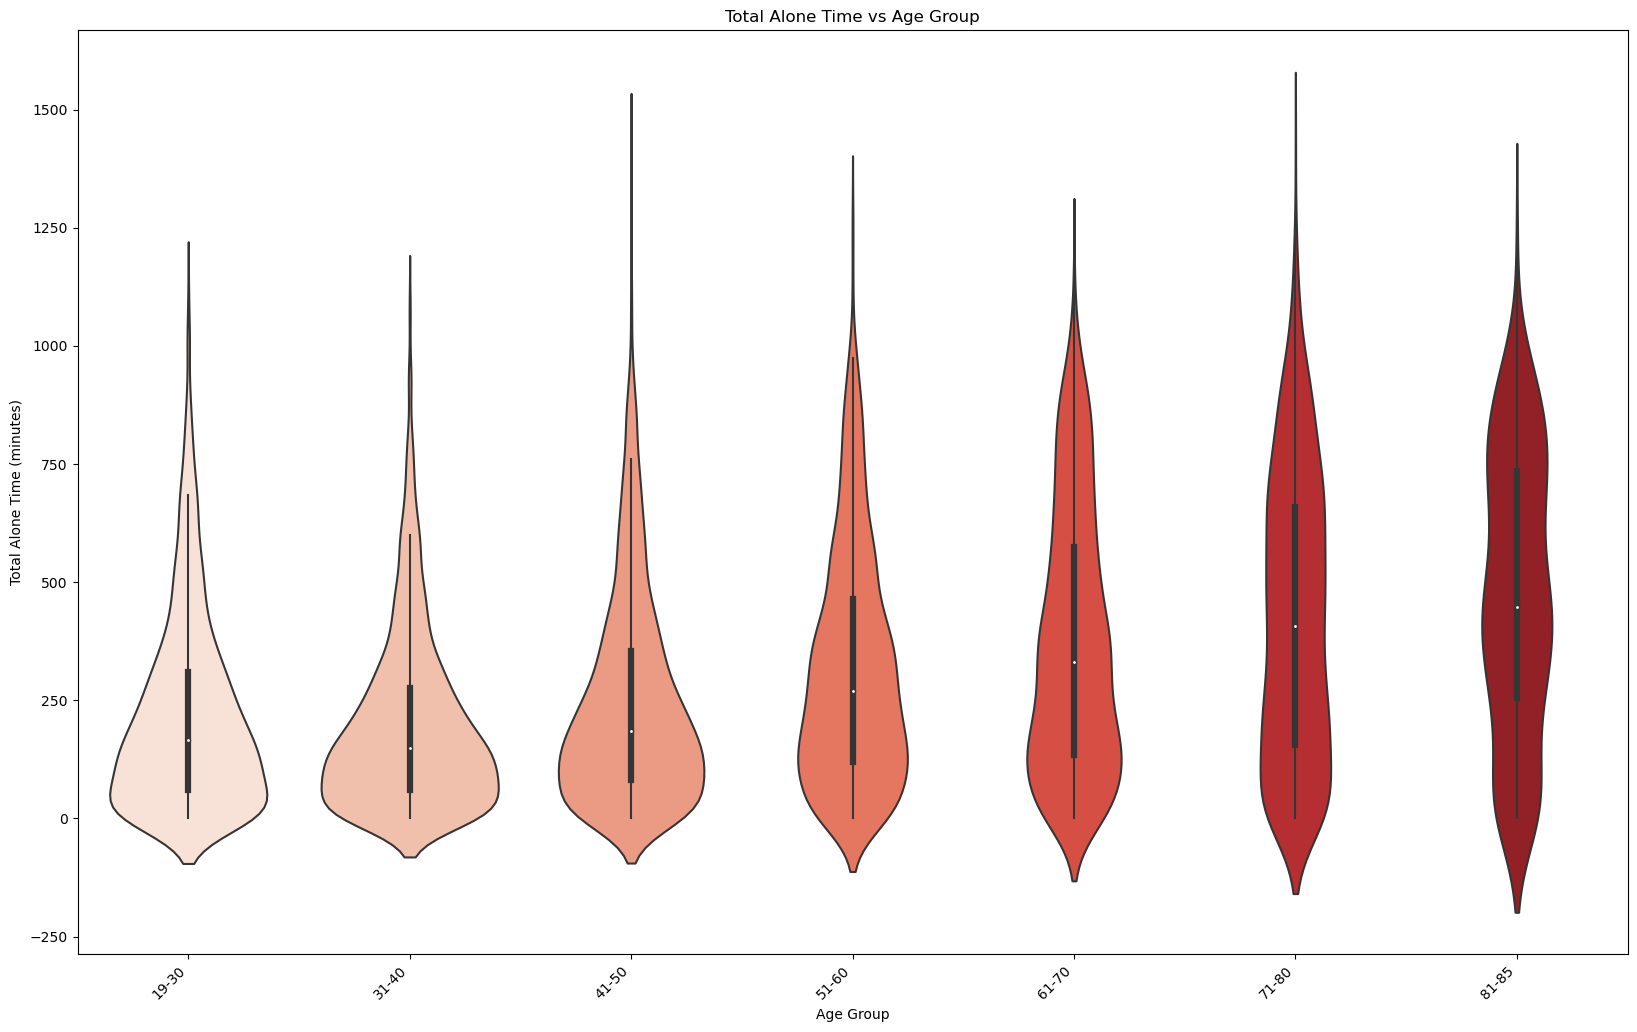

In [29]:
# Grouping ages into bins
age_bins = [19, 30, 40, 50, 60, 70, 80, 85]
age_labels = ['19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-85']

# Add a new column for age categories
final_df['Age Group'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(20, 12))
sns.violinplot(data=final_df, x='Age Group', y='TRTALONE', palette='Reds')
plt.title('Total Alone Time vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Alone Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()



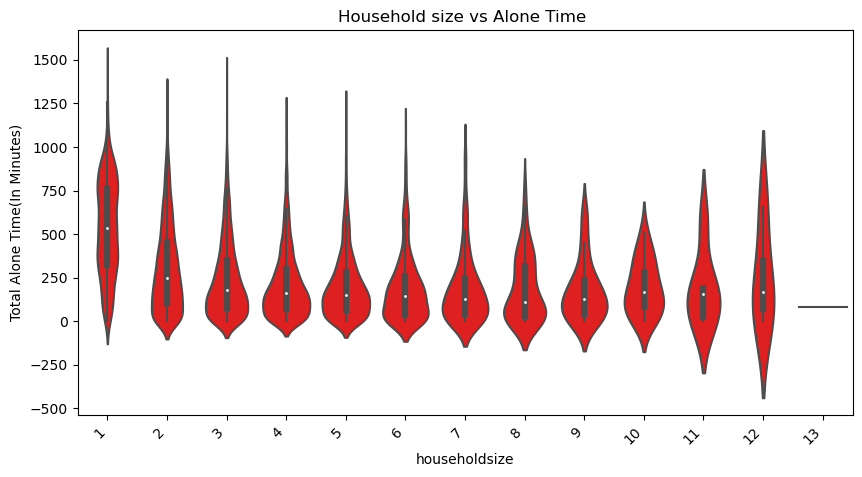

In [31]:
# Number of people living in the respondents household vs alone time 

plt.figure(figsize=(10, 5))

sns.violinplot(data=final_df, x='HH_size', y='TRTALONE', color='red')

plt.title('Household size vs Alone Time ')
plt.xlabel('householdsize')
plt.ylabel('Total Alone Time(In Minutes)')
plt.xticks(rotation=45, ha='right')

plt.show()

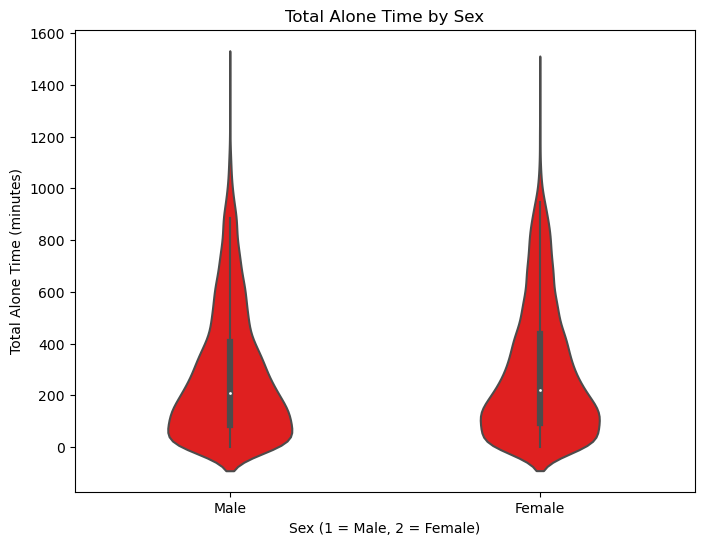

In [32]:
# boxplot for TRTALONE by TESEX
plt.figure(figsize=(8, 6))

sns.violinplot(data=final_df, x='Sex', y='TRTALONE', color='red', width=0.4)

plt.title('Total Alone Time by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Total Alone Time (minutes)')
plt.xticks([0, 1], ['Male', 'Female'])  

plt.show()

In [33]:
data.columns.unique()

Index(['TUCASEID', 'TRTALONE', 'HH_size', 'Spouse_Partner_Presence',
       'Labour_Status', 'TimewithSpouse/Partener(Minutes)',
       'TimewithFamily(Minutes)', 'Age', 'Sex', 'YEAR', 'Age Group'],
      dtype='object')

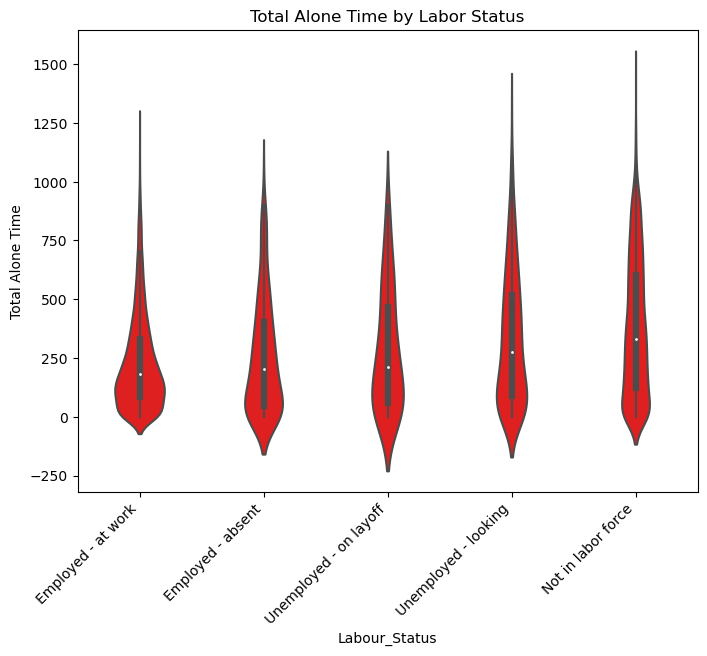

In [45]:
# plot for labour status 
plt.figure(figsize=(8, 6))

# Create a violin plot
sns.violinplot(data=final_df, x='Labour_Status', y='TRTALONE', color='red', width=0.4)

# Customizing the plot
plt.title('Total Alone Time by Labor Status')
plt.ylabel('Total Alone Time') 
plt.xticks(
    rotation=45, 
    ha='right'    
)

plt.gca().set_xticklabels(['Employed - at work', 'Employed - absent', 'Unemployed - on layoff', 'Unemployed - looking', 'Not in labor force'])

plt.show()


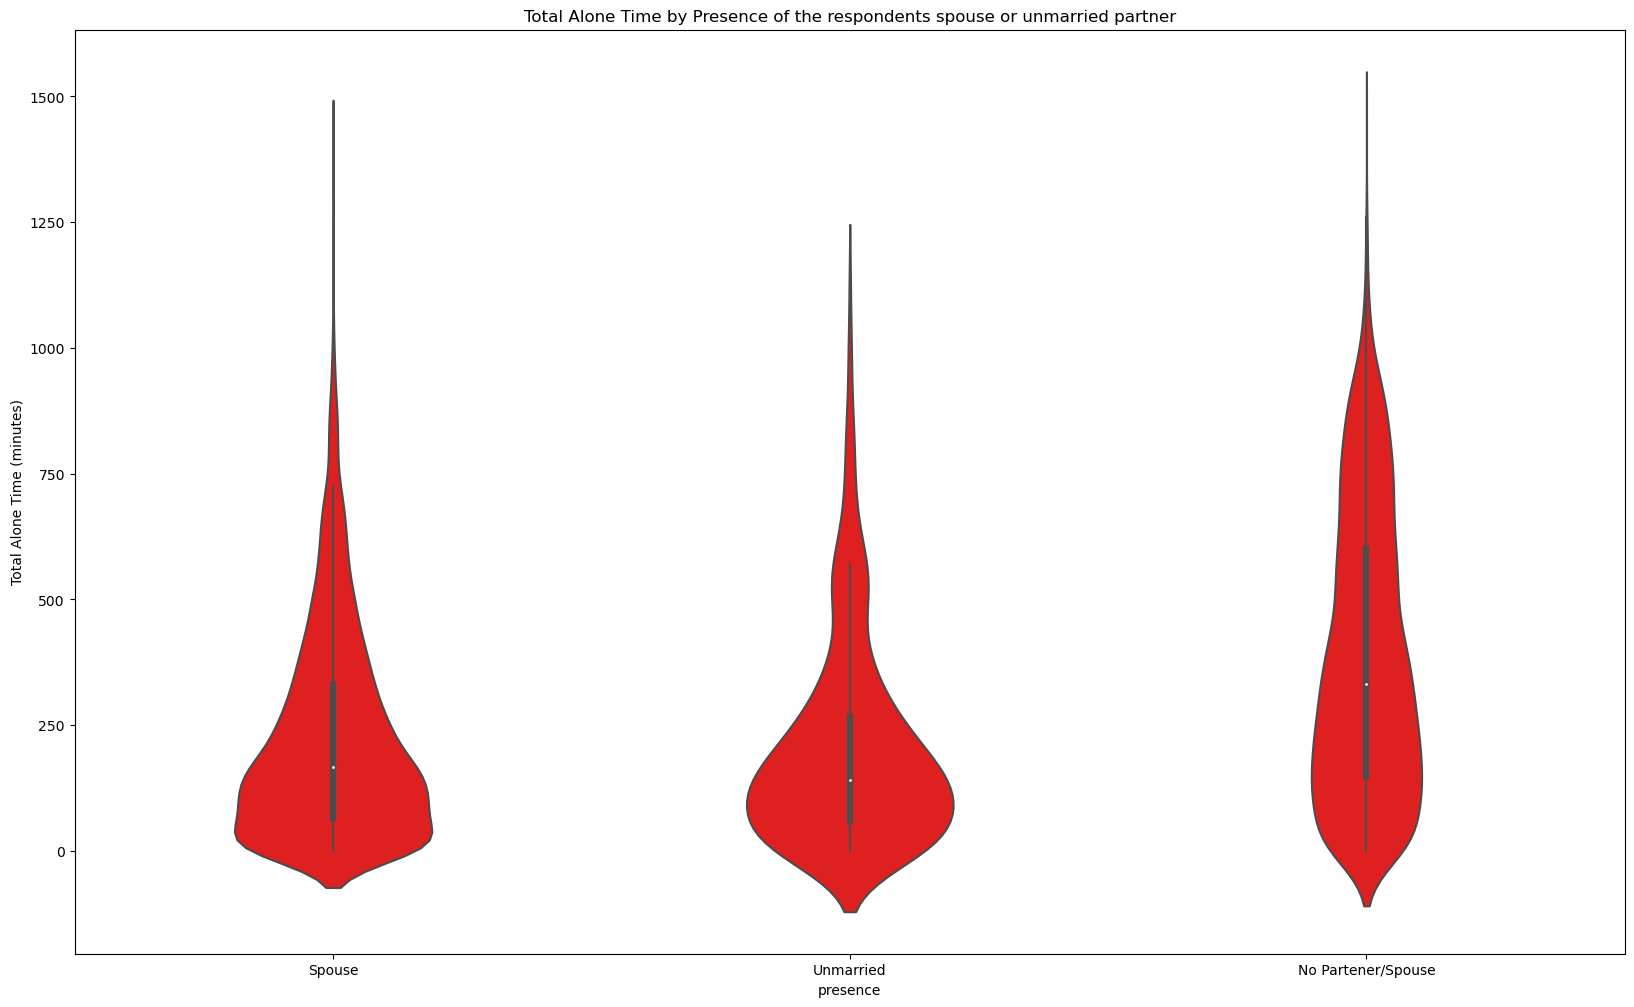

In [36]:
# boxplot for Total Alone Time by Presence of the respondents spouse or unmarried partner
plt.figure(figsize=(20, 12))

sns.violinplot(data=final_df, x='Spouse_Partner_Presence', y='TRTALONE', color='red', width=0.4)

plt.title('Total Alone Time by Presence of the respondents spouse or unmarried partner')
plt.xlabel('presence')
plt.ylabel('Total Alone Time (minutes)')
plt.xticks([0, 1, 2], ['Spouse', 'Unmarried', 'No Partener/Spouse'])  

plt.show()

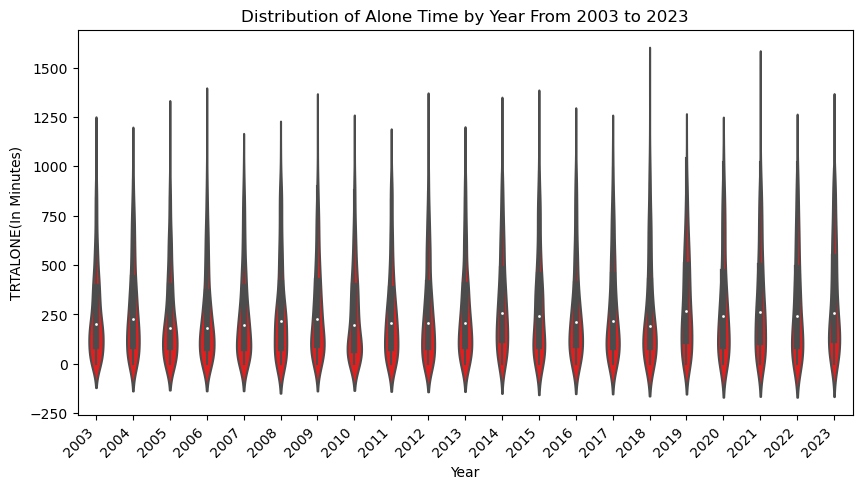

In [46]:
# plot of 'TRTALONE' values grouped by 'YEAR'
plt.figure(figsize=(10, 5))

sns.violinplot(data=final_df, x='YEAR', y='TRTALONE', color='red', width=0.4)

plt.title('Distribution of Alone Time by Year From 2003 to 2023')
plt.xlabel('Year')
plt.ylabel('TRTALONE(In Minutes)')
plt.xticks(rotation=45, ha='right')

plt.show()

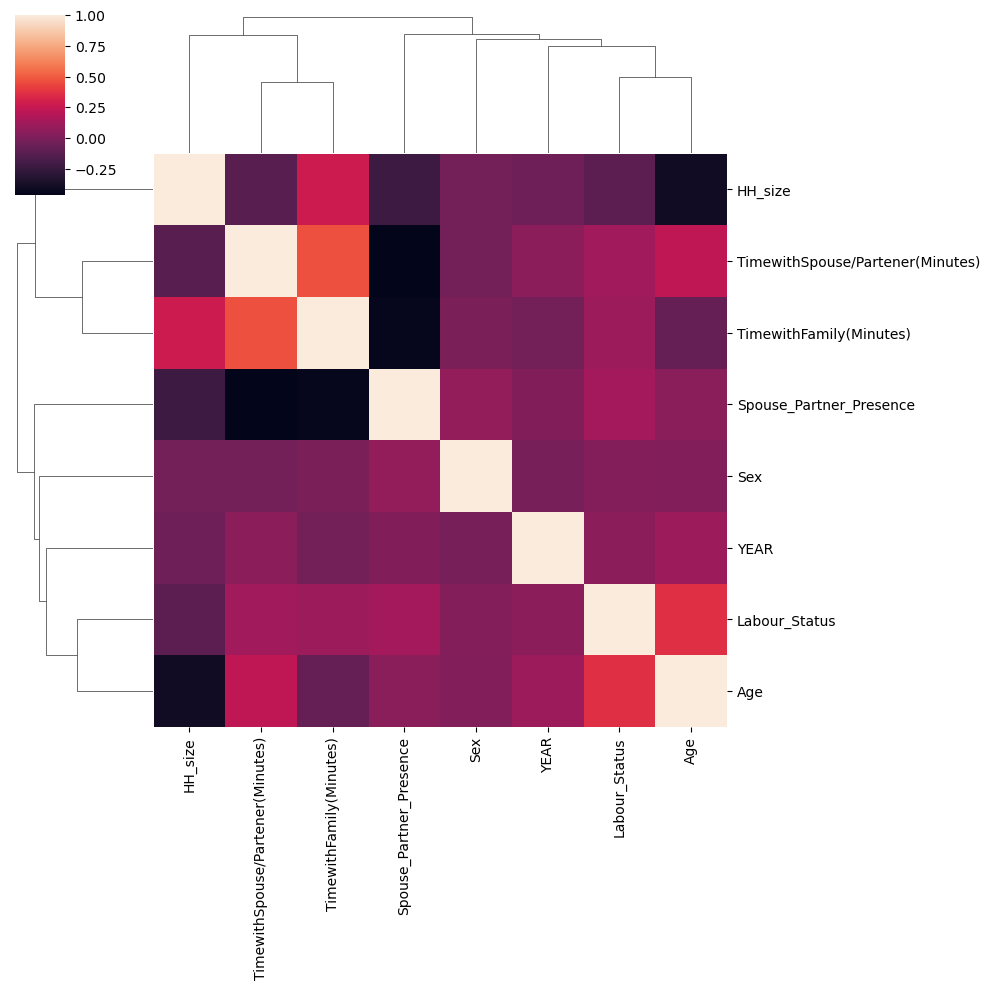

In [50]:
#check for the correlation between the predictors 
# Select only the predictor columns
predictor_cols = [col for col in data.columns if col not in ['TUCASEID', 'TRTALONE', 'Age Group']]

# Calculate the correlation matrix for the predictor variables
correlation_matrix = data[predictor_cols].corr()

sns.clustermap(correlation_matrix )

In [51]:
correlation_matrix
#There are no pairs of features with a correlation high enough to warrant exclusion based on this matrix

,HH_size,Spouse_Partner_Presence,Labour_Status,TimewithSpouse/Partener(Minutes),TimewithFamily(Minutes),Age,Sex,YEAR
HH_size,1.000000,-0.222941,-0.111726,-0.122634,0.273318,-0.396269,-0.029700,-0.050224
Spouse_Partner_Presence,-0.222941,1.000000,0.129387,-0.461500,-0.438984,0.045129,0.076092,0.012679
Labour_Status,-0.111726,0.129387,1.000000,0.121483,0.105106,0.362758,0.028809,0.052450
TimewithSpouse/Partener(Minutes),-0.122634,-0.461500,0.121483,1.000000,0.465244,0.228860,-0.029584,0.049060
TimewithFamily(Minutes),0.273318,-0.438984,0.105106,0.465244,1.000000,-0.077196,-0.000971,-0.031949
Age,-0.396269,0.045129,0.362758,0.228860,-0.077196,1.000000,0.020987,0.108692
Sex,-0.029700,0.076092,0.028809,-0.029584,-0.000971,0.020987,1.000000,-0.016532
YEAR,-0.050224,0.012679,0.052450,0.049060,-0.031949,0.108692,-0.016532,1.000000


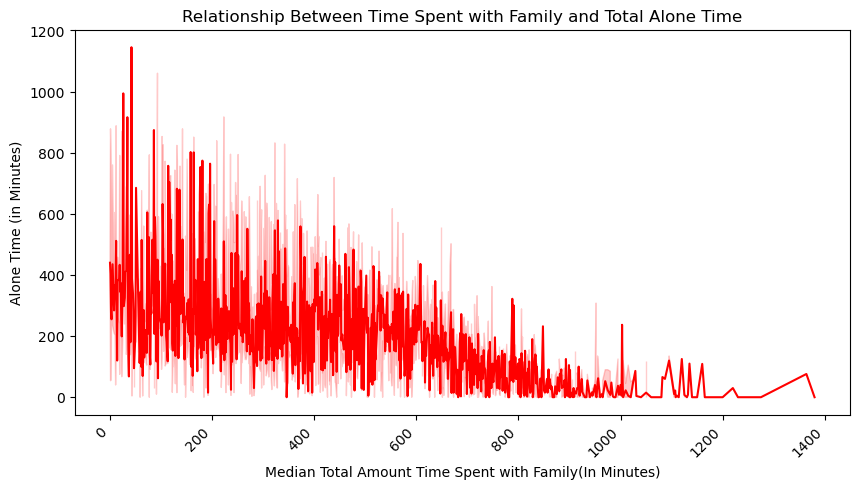

In [69]:
#Relationship Between Time Spent with Family and Total Alone Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=final_df, x='TimewithFamily(Minutes)', y='TRTALONE', color='red', estimator='median')

# Title and labels
plt.title('Relationship Between Time Spent with Family and Total Alone Time')
plt.xlabel('Median Total Amount Time Spent with Family(In Minutes)')
plt.ylabel('Alone Time (in Minutes)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


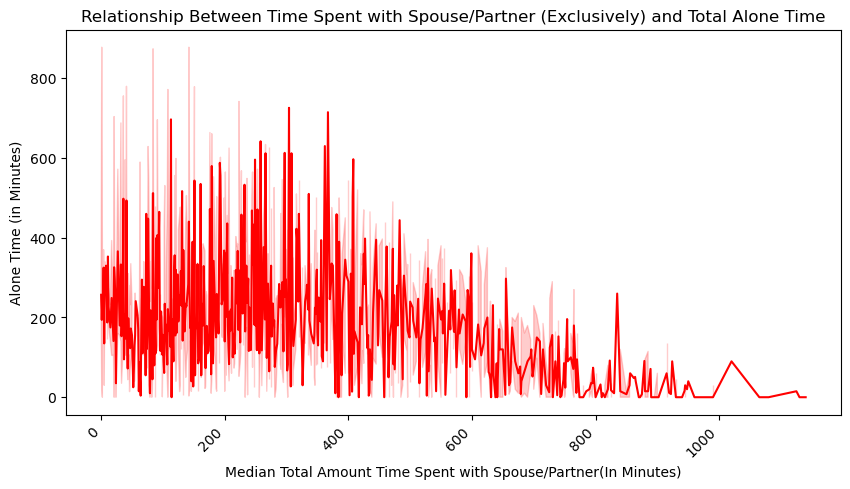

In [70]:
#Relationship Between TimewithSpouse/Partener(Minutes) and Total Alone Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=final_df, x='TimewithSpouse/Partener(Minutes)', y='TRTALONE', color='red', estimator='median')

# Title and labels
plt.title('Relationship Between Time Spent with Spouse/Partner (Exclusively) and Total Alone Time')
plt.xlabel('Median Total Amount Time Spent with Spouse/Partner(In Minutes)')
plt.ylabel('Alone Time (in Minutes)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [87]:
max(data['TRTALONE'])

1440

Modeling 

                            OLS Regression Results                            
Dep. Variable:               TRTALONE   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     901.6
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:43:40   Log-Likelihood:                -65902.
No. Observations:                9884   AIC:                         1.318e+05
Df Residuals:                    9875   BIC:                         1.319e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

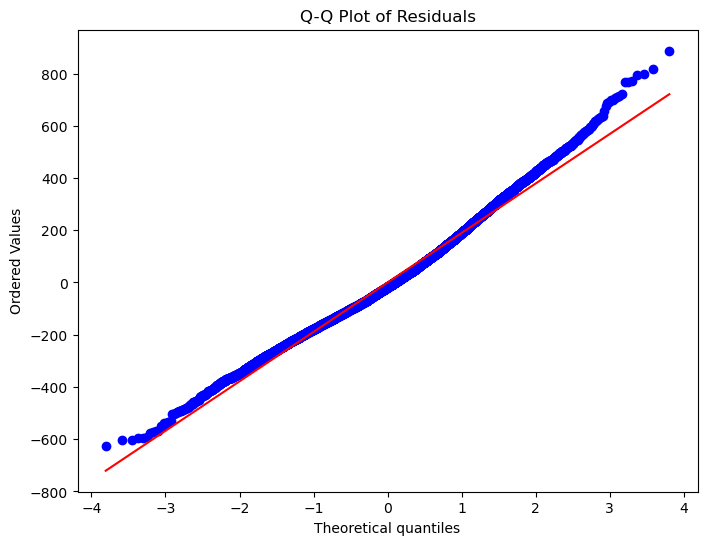

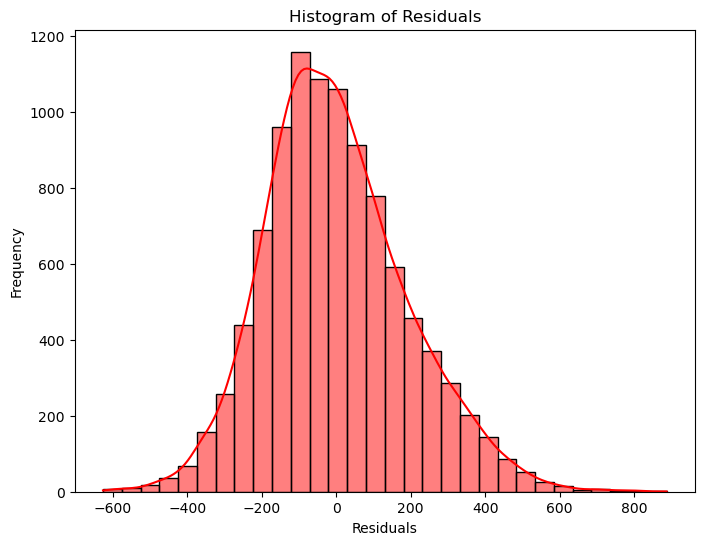

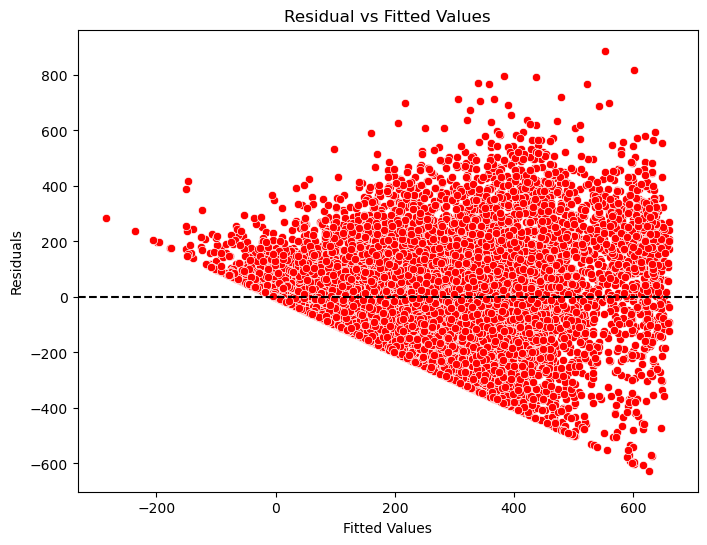

In [68]:
# OLS Model
# Prepare the predictor columns (excluding the dependent variable and any categorical variables you may need to encode)
predictors= [col for col in data.columns if col not in ['TRTALONE', 'Age Group', 'TUCASEID']]

# predictors and dependent variable
X = data[predictors]
y = data['TRTALONE']

# intercept term
X = sm.add_constant(X)
# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# model summary
print(ols_model.summary())

# Get residuals
residuals = ols_model.resid
fitted = ols_model.fittedvalues

# Normality of residuals

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='red', bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#Homoscedasticity (Equal variance)

# Residual vs Fitted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted, y=residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 
# If you see a pattern in the residual vs fitted plot (like a funnel shape), it suggests heteroscedasticity.




/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_5112/1520775460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TRTALONE_sqrt'] = np.sqrt(data['TRTALONE'])


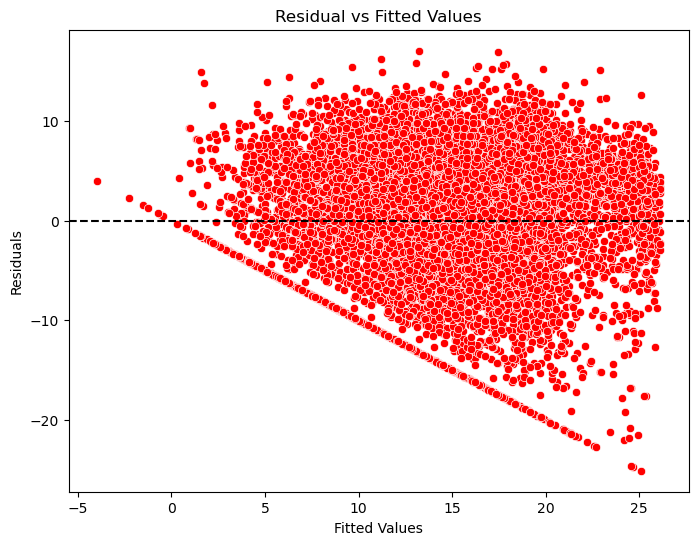

In [75]:
# Applying square root transformation to the response variable since the equal varience is not met 
data['TRTALONE_sqrt'] = np.sqrt(data['TRTALONE'])

# use the transformed response variable in the OLS model
X = data[predictors]
y = data['TRTALONE_sqrt']  # Using the transformed variable

# Add intercept term
X = sm.add_constant(X)

# Fit the OLS model with transformed data
ols_model_sqrt = sm.OLS(y, X).fit()

# Model summary
ols_model_sqrt.summary()

# Get residuals
residuals2 = ols_model_sqrt.resid
fitted2 = ols_model_sqrt.fittedvalues

# Residual vs Fitted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted2, y=residuals2, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [67]:
#  Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 
X_train = sm.add_constant(X_train)  # Add constant to the training set
X_test = sm.add_constant(X_test)  # Add constant to the testing set

# Fit the OLS model on the training data
ols_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test data
y_pred = ols_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the model summary and RMSE
print(ols_model.summary())
print(f"Root Mean Squared Error (RMSE): {rmse}")


                            OLS Regression Results                            
Dep. Variable:               TRTALONE   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     641.0
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:43:06   Log-Likelihood:                -46134.
No. Observations:                6918   AIC:                         9.229e+04
Df Residuals:                    6909   BIC:                         9.235e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [66]:
from scipy.stats import levene

# list to store Levene's test results
levene_results = []


for predictor in predictor_cols:
    # Check if the predictor is categorical or continuous
    if data[predictor].nunique() < 10:  # Categorical variable
        # Group residuals by the predictor categories
        groups = [residuals[data[predictor] == level] for level in data[predictor].unique()]
    else:  # Continuous variable
        # Bin continuous variable into quartiles for grouping
        bins = pd.qcut(data[predictor], q=4, duplicates='drop')  # Bin into quartiles
        groups = [residuals[bins == level] for level in bins.unique()]
    
    # Perform Levene's Test for equal variance
    levene_stat, levene_p = levene(*groups, center='median')  # Median for robustness
    
    # Store the result
    levene_results.append({'Predictor': predictor, 'Levene Statistic': levene_stat, 'Levene P-Value': levene_p})

# Convert the results into a DataFrame
levene_results_df = pd.DataFrame(levene_results)

# Display the results
print("Levene's Test Results:")
print(levene_results_df)


Levene's Test Results:
   Predictor  Levene Statistic  Levene P-Value
0   TRNUMHOU          8.333321    1.780966e-05
1   TRSPPRES         16.979487    5.608253e-08
2      TELFS          1.366243    2.436706e-01
3  TRTSPONLY          9.780898    1.814467e-03
4  TRTFAMILY         45.058240    2.631951e-27
5      TEAGE          5.382731    1.119837e-03
6      TESEX          0.071860    7.887031e-01
7       YEAR          0.811465    4.875870e-01


In [69]:
levene_results_df

,Predictor,Levene Statistic,Levene P-Value
0,TRNUMHOU,8.333321,1.780966e-05
1,TRSPPRES,16.979487,5.608253e-08
2,TELFS,1.366243,2.436706e-01
3,TRTSPONLY,9.780898,1.814467e-03
4,TRTFAMILY,45.058240,2.631951e-27
5,TEAGE,5.382731,1.119837e-03
6,TESEX,0.071860,7.887031e-01
7,YEAR,0.811465,4.875870e-01


Model 2: Random Forest

In [79]:
def random_forest_regression(data, target, predictors):
    """
    Perform Random Forest Regression to predict the target variable.
    
    Parameters:
        data (pd.DataFrame): Dataset containing the target and predictors.
        target (str): Name of the dependent variable.
        predictors (list): List of predictor variable names.
    
    Returns:
        dict: Model performance metrics.
    """
    X = data[predictors]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize and fit the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test)
    
    # Evaluate model performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Return performance metrics
    return {
        'Root Mean Squared Error': rmse,
        'R-squared': r2,
        'Feature Importances': rf_model.feature_importances_
    }

results = random_forest_regression(data, 'TRTALONE', predictors)

print(f"Model Performance Metrics:")
for key, value in results.items():
    print(f"{key}: {value}")

Model Performance Metrics:
Root Mean Squared Error: 186.6407110606137
R-squared: 0.4316076482874083
Feature Importances: [0.08605934 0.02732842 0.1596307  0.03885105 0.36242286 0.1754922
 0.02460984 0.12560558]


In [84]:
predictors = ['HH_size',
 'Spouse_Partner_Presence',
 'Labour_Status',
 'TimewithSpouse/Partener(Minutes)',
 'TimewithFamily(Minutes)',
 'Age',
 'Sex',
 'YEAR']

importances =[0.08605934, 0.02732842, 0.1596307,  0.03885105, 0.36242286, 0.1754922,
 0.02460984, 0.12560558]

# Create a DataFrame to show feature names and their corresponding importances
feature_importances_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df


,Feature,Importance
4,TimewithFamily(Minutes),0.362423
5,Age,0.175492
2,Labour_Status,0.159631
7,YEAR,0.125606
0,HH_size,0.086059
3,TimewithSpouse/Partener(Minutes),0.038851
1,Spouse_Partner_Presence,0.027328
6,Sex,0.024610
